# **Exercise session 3: Convolutional neural network (CNN) and support vector machine (SVM) to detect $CH_4$ emissions from satellite data**

**Reference:** Schuit, Berend J., et al. "Automated detection and monitoring of methane super-emitters using satellite data." Atmospheric Chemistry and Physics Discussions (2023): 1-47.e

**Data:** 
- Sentinel 5P, bands CH4, CO, SO2 and NO2
- Sentinel 3, bands S5 and S6
- [all TROPOMI detected plumes for 2021. (Schuit et al. 2023)](https://zenodo.org/records/8087134)

**Useful tutorials:**
- [SVM for Multiclass Classification](https://www.kaggle.com/code/pranathichunduru/svm-for-multiclass-classification)

This exercise is designed to be completed on Aalto JupyterHub. Please ensure that your notebook includes all necessary installation commands for any additional libraries your code requires. These commands should be clearly written and integrated within your notebook. To submit, go to Nbgrader/Assignment List and click submit next to the exercise. 
All data loaded from Copernicus Dataspace, should be saved to /coursedata/users/$USER folder.

The exercise consists of two parts:
- In Part I (Ex. 3.1 - 3.2) you will discuss and compare the approaches to designing automated emissions monitoring algorithms in Finch et al. (2022), Schuit et al. (2023) and your own in Assignment 2
- In Part II (Ex. 3.3 - 3.8) you will use the TROPOMI detected plumes for 2021 (Schuit et al. 2023) to construct a multiclass SVM algorithm to distinguish between oil, gas and coal emissions.

The deadline is March 1 at 10:00. We will be grading the submissions as they arrive, so if you submit before the deadline, you will most likely get feedback earlier.

In [ ]:
# Import necessary modules. If any additional modules need to be installed to run it on Aalto JupyterHub, include all necessary installation commands.

## Exercise 3.1 Convolutional Neural Networks for detecting gas plumes (2 pt)

Compare the approaches takes in Finch et al. (2022), Schuit et al. (2023) and your own in Assignment 2. What are the strength and weaknesses of each approach? Consider both data preparation and model design.

**Data Preparation**

1. Schuit et al. Approach
- Strengths: Comprehensive data utilization ensures a diverse variety of input and data balancing for robust training.
- Weaknesses: There is high complexity in data processing, which might increase preparation time. The processing metod can bear risk of biases in data selection or normalization.

2. Finch et al. Approach

- Strengths: Individual image normalization improves model efficiency; balanced dataset helps minimize classification biases.
- Weaknesses: There could be room for misinterpretation due to background noise; and the proposed methods are limited by the specific characteristics of NO2 plumes.

3. Assignment 2 Approach

- Strengths: Pixel value normalization enables faster convergence; there are distinct datasets for training, validation, and testing processes.
- Weaknesses: Smaller dataset size of only around hundred images may not allow the trained model to generalize over unseen images; basic preprocessing might not account for complex plumes pattern

**Model Design**

1. Schuit et al. Approach

- Strengths: Two-step method (CNN and SVC) can improve accuracy; The designed architecture for methane plume detection is shown to improve specificity.
- Weaknesses: Complexity may require more computational resources; models that are too specific might limit its application to other plume patterns.

2. Finch et al. Approach

- Strengths: Efficient CNN architecture suitable for NO2 plume detection; dropout application reduces overfitting risk.
- Weaknesses: The model does not quantify emissions, limiting its application scope. There is also dependence on human judgment for plume identification.

3. Assignment 2 Approach

- Strengths: Model simplicity makes it relatively easy to understand and implement; suitable for smaller datasets and initial model design exploration.
- Weaknesses: Limited model complexity may not recognize more subtle patterns; there is risk of overfitting as the model is not regularized except early stopping

## Exercise 3.2 Trustworthy monitoring of emissions (2 pt)

One design requirement for introducing an automated monitoring system of emissions is that this system is trustworthy. The EC High-Level Expert Group on AI have developed the [Ethics Guidelines for Trustworthy Artificial Intelligence](https://digital-strategy.ec.europa.eu/en/library/ethics-guidelines-trustworthy-ai) that outline 7 key requirements that AI system needs to satisfy in order to be deemed trustworthy. Discuss how well the approaches in Finch et al. (2022), Schuit et al. (2023) and Assignment 2 satisfy those requirements. You can discuss all three approaches more generally or have a deeper focused discussion about one of them.

(Optional) If you interested to learn more, here are some references:
- [Deliverables of the High-Level Expert Group on AI](https://digital-strategy.ec.europa.eu/en/policies/expert-group-ai)
- Review papers on bias in ML: 
    - Mehrabi, Ninareh, et al. "A survey on bias and fairness in machine learning." ACM computing surveys (CSUR) 54.6 (2021): 1-35.
    - Chakraborty, Joymallya, Suvodeep Majumder, and Tim Menzies. "Bias in machine learning software: Why? how? what to do?." Proceedings of the 29th ACM Joint Meeting on European Software Engineering Conference and Symposium on the Foundations of Software Engineering. 2021.

**Seven key requirements that Ai systems needs to satisfy to be trustworthy**
(page 16 of the paper)

1. Human agency and oversight

Including fundamental rights, human agency and human oversight

2. Technical robustness and safety

Including resilience to attack and security, fall back plan and general safety, accuracy, reliability and reproducibility

3. Privacy and data governance
Including respect for privacy, quality and integrity of data, and access to data

4. Transparency

Including traceability, explainability and communication

5. Diversity, non-discrimination and fairness
Including the avoidance of unfair bias, accessibility and universal design, and stakeholder participation

6. Societal and environmental wellbeing
Including sustainability and environmental friendliness, social impact, society and democracy

7. Accountability
Including auditability, minimisation and reporting of negative impact, trade-offs and redress.

From these seven point, we can discuss the aspects of trustworthy AI that the three approaches satisfy

**Schuit et al. Approach**

- Satisfied requirements: 

Technical Robustness and Safety: Their advanced model likely demonstrates high levels of accuracy and reliability.

Transparency: There is detailed documentation of methodology, which can helps the method become transparent.

- Unsatisfied requirements: 

Diversity, Non-discrimination, and Fairness: The study do not address the impact of its AI system on diverse demographic groups. However, lack of discussion does not really imply the lack of requirement.

Societal and Environmental Well-being: While focused on environmental monitoring, the social impact might not be thoroughly documented.

**Finch et al. Approach**

- Satisfied requirements: 

Privacy and Data Governance: The use of satellite data likely takes into account the data protection and integrity.

Accountability: The research implies some accountability in terms of scientific rigor and ethical considerations.

- Unsatisfied requirements: 

Human Agency and Oversight: The effect of human oversight in the decision-making process by the AI system is still unclear.

Societal and Environmental Well-being: Direct impacts on social well-being is not one of the focuses of the study.

**Assignment 2 Approach**

- Satisfied requirements: 

Transparency: The approach includes clear documentation of the CNN model.

Accountability: There is typically a framework for accountability through assignment grading, but I'm not sure on this.

- Unsatisfied requirements: 

Technical Robustness and Safety: Given the basic CNN model, it might lack the robustness and safety features of more advanced systems in the two previous papers

Diversity, Non-discrimination, and Fairness: The approach do not address issues of bias and fairness in the AI model.

## Exercise 3.3 Batch jobs and server-side computations using OpenEO (1 pt)

So far you have been using openEO for synchronous execution of your requests: you submitted a request and the result came as a direct response to your request. This is not feasible for heavier work. Instead, one should submit the requests as batch jobs. Familiarise yourself with the Batch-job-combine-tasks.ipynb file.

Furthermore, instead of downloading large amounts of raw data, one can process the data directly on server side. You can check all available processes by running 'connection.list_processes()'. For more details, see the [EO Cookbook](https://openeo.org/documentation/1.0/cookbook/#temporal-mean-reduce-dimension). Note that they give two alternatives on how to compute the temporal mean and we recommend to use the 'reduce_dimension' function.

Task: fix an area of interest and a time period and load the min, max, mean and standard deviation of CH4. Perform this task as a batch job using server-side processes. You should save the output in the JSON format. Note that the output is computed per pixel.

In [1]:
import pathlib
import rasterio
import matplotlib.pyplot as plt
import openeo
import pandas as pd
import numpy as np
import xarray as xr
import os
import joblib
import json
from openeo.rest.conversions import timeseries_json_to_pandas

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [2]:
connection = openeo.connect(url="openeo.dataspace.copernicus.eu")
connection.authenticate_oidc()

Visit https://identity.dataspace.copernicus.eu/auth/realms/CDSE/device?user_code=EJWM-TTAY 📋 to authenticate.

[###################################--] ✅ Authorized successfully

Authenticated using device code flow.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

In [3]:
# print(connection.list_collections())
for collection in connection.list_collections():
    print(collection['id'])

SENTINEL3_OLCI_L1B
SENTINEL3_SLSTR
SENTINEL_5P_L2
SENTINEL2_L1C
SENTINEL2_L2A
SENTINEL1_GRD
COPERNICUS_30
LANDSAT8_L2


In [6]:
download_path = "/coursedata/users/nguyenb5"

period=("2022-05-01", "2022-06-01")

aoi={
        "west": 3.20,
        "south": 51.18,
        "east": 3.70,
        "north": 51.68,
        "crs": "EPSG:4326",
    }

# Server-side computations with Sentinel 5 data process one band at a time
s5_CH4 = connection.load_collection(
    "SENTINEL_5P_L2",
    spatial_extent=aoi,
    temporal_extent = period,
    bands=["CH4"]
)

In [19]:
ch4_data_min = ch4_data.reduce_dimension(
    reducer="min", 
    dimension="t"
)

ch4_data_min = ch4_data_min.save_result(format="netCDF") # We can also choose JSON format
job = ch4_data_min.create_job(title="CH4 min")
job.start_and_wait()
result = job.get_results()
result.download_file(f"{download_path}/assignment3_Task3/CH4_min.nc") # if JSON chosen then extension is .json

0:00:00 Job 'j-240212de5e4944fc8ffa7f5133e789f5': send 'start'
0:00:17 Job 'j-240212de5e4944fc8ffa7f5133e789f5': queued (progress N/A)
0:00:22 Job 'j-240212de5e4944fc8ffa7f5133e789f5': queued (progress N/A)
0:00:29 Job 'j-240212de5e4944fc8ffa7f5133e789f5': queued (progress N/A)
0:00:45 Job 'j-240212de5e4944fc8ffa7f5133e789f5': queued (progress N/A)
0:00:55 Job 'j-240212de5e4944fc8ffa7f5133e789f5': queued (progress N/A)
0:01:11 Job 'j-240212de5e4944fc8ffa7f5133e789f5': queued (progress N/A)
0:01:27 Job 'j-240212de5e4944fc8ffa7f5133e789f5': running (progress N/A)
0:01:47 Job 'j-240212de5e4944fc8ffa7f5133e789f5': running (progress N/A)
0:02:14 Job 'j-240212de5e4944fc8ffa7f5133e789f5': running (progress N/A)
0:02:46 Job 'j-240212de5e4944fc8ffa7f5133e789f5': finished (progress N/A)


PosixPath('/coursedata/users/nguyenb5/assignment3_Task3/CH4_min.nc')

In [20]:
ch4_data_max = ch4_data.reduce_dimension(
    reducer="max", 
    dimension="t"
)

ch4_data_max = ch4_data_max.save_result(format="netCDF") # We can also choose JSON format
job = ch4_data_max.create_job(title="CH4 max")
job.start_and_wait()
result = job.get_results()
result.download_file(f"{download_path}/assignment3_Task3/CH4_max.nc") # if JSON chosen then extension is .json


0:00:00 Job 'j-24021275e68c475e893b33572a1546eb': send 'start'
0:00:28 Job 'j-24021275e68c475e893b33572a1546eb': created (progress N/A)
0:00:33 Job 'j-24021275e68c475e893b33572a1546eb': created (progress N/A)
0:00:40 Job 'j-24021275e68c475e893b33572a1546eb': created (progress N/A)
0:00:48 Job 'j-24021275e68c475e893b33572a1546eb': created (progress N/A)
0:00:59 Job 'j-24021275e68c475e893b33572a1546eb': created (progress N/A)
0:01:12 Job 'j-24021275e68c475e893b33572a1546eb': created (progress N/A)
0:01:27 Job 'j-24021275e68c475e893b33572a1546eb': running (progress N/A)
0:01:48 Job 'j-24021275e68c475e893b33572a1546eb': running (progress N/A)
0:02:14 Job 'j-24021275e68c475e893b33572a1546eb': running (progress N/A)
0:02:47 Job 'j-24021275e68c475e893b33572a1546eb': finished (progress N/A)


PosixPath('/coursedata/users/nguyenb5/assignment3_Task3/CH4_max.nc')

In [21]:
ch4_data_mean = ch4_data.reduce_dimension(
    reducer="mean", 
    dimension="t"
)

ch4_data_mean = ch4_data_mean.save_result(format="netCDF") # We can also choose JSON format
job = ch4_data_mean.create_job(title="CH4 mean")
job.start_and_wait()
result = job.get_results()
result.download_file(f"{download_path}/assignment3_Task3/CH4_mean.nc") # if JSON chosen then extension is .json

0:00:00 Job 'j-24021223522843b9a7e44f29d3907444': send 'start'
0:00:15 Job 'j-24021223522843b9a7e44f29d3907444': created (progress N/A)
0:00:21 Job 'j-24021223522843b9a7e44f29d3907444': created (progress N/A)
0:00:28 Job 'j-24021223522843b9a7e44f29d3907444': running (progress N/A)
0:00:38 Job 'j-24021223522843b9a7e44f29d3907444': running (progress N/A)
0:00:50 Job 'j-24021223522843b9a7e44f29d3907444': running (progress N/A)
0:01:03 Job 'j-24021223522843b9a7e44f29d3907444': running (progress N/A)
0:01:19 Job 'j-24021223522843b9a7e44f29d3907444': running (progress N/A)
0:01:40 Job 'j-24021223522843b9a7e44f29d3907444': running (progress N/A)
0:02:06 Job 'j-24021223522843b9a7e44f29d3907444': running (progress N/A)
0:02:37 Job 'j-24021223522843b9a7e44f29d3907444': running (progress N/A)
0:03:15 Job 'j-24021223522843b9a7e44f29d3907444': finished (progress N/A)


PosixPath('/coursedata/users/nguyenb5/assignment3_Task3/CH4_mean.nc')

In [23]:
ch4_data_std = ch4_data.reduce_dimension(
    reducer="sd", 
    dimension="t"
)

ch4_data_std = ch4_data_std.save_result(format="netCDF") # We can also choose JSON format
job = ch4_data_std.create_job(title="CH4 std")
job.start_and_wait()
result = job.get_results()
result.download_file(f"{download_path}/assignment3_Task3/CH4_sd.nc") # if JSON chosen then extension is .json

0:00:00 Job 'j-240212aba8704a71b03a5610d2db6f30': send 'start'
0:00:14 Job 'j-240212aba8704a71b03a5610d2db6f30': created (progress N/A)
0:00:19 Job 'j-240212aba8704a71b03a5610d2db6f30': running (progress N/A)
0:00:26 Job 'j-240212aba8704a71b03a5610d2db6f30': running (progress N/A)
0:00:35 Job 'j-240212aba8704a71b03a5610d2db6f30': running (progress N/A)
0:00:45 Job 'j-240212aba8704a71b03a5610d2db6f30': running (progress N/A)
0:00:59 Job 'j-240212aba8704a71b03a5610d2db6f30': running (progress N/A)
0:01:14 Job 'j-240212aba8704a71b03a5610d2db6f30': running (progress N/A)
0:01:34 Job 'j-240212aba8704a71b03a5610d2db6f30': running (progress N/A)
0:01:58 Job 'j-240212aba8704a71b03a5610d2db6f30': running (progress N/A)
0:02:31 Job 'j-240212aba8704a71b03a5610d2db6f30': finished (progress N/A)


PosixPath('/coursedata/users/nguyenb5/assignment3_Task3/CH4_sd.nc')

In [24]:
ch4_data_std = ch4_data.reduce_dimension(
    reducer="sd", 
    dimension="t"
)

ch4_data_std = ch4_data_std.save_result(format="JSON") # We can also choose JSON format
job = ch4_data_std.create_job(title="CH4 std")
job.start_and_wait()
result = job.get_results()
result.download_file(f"{download_path}/assignment3_Task3/CH4_sd.json") # if JSON chosen then extension is .json

0:00:00 Job 'j-240212c052bf4a7da46756ea13321eb3': send 'start'
0:00:23 Job 'j-240212c052bf4a7da46756ea13321eb3': running (progress N/A)
0:00:29 Job 'j-240212c052bf4a7da46756ea13321eb3': running (progress N/A)
0:00:36 Job 'j-240212c052bf4a7da46756ea13321eb3': running (progress N/A)
0:00:45 Job 'j-240212c052bf4a7da46756ea13321eb3': running (progress N/A)
0:00:55 Job 'j-240212c052bf4a7da46756ea13321eb3': running (progress N/A)
0:01:09 Job 'j-240212c052bf4a7da46756ea13321eb3': running (progress N/A)
0:01:25 Job 'j-240212c052bf4a7da46756ea13321eb3': running (progress N/A)
0:01:44 Job 'j-240212c052bf4a7da46756ea13321eb3': running (progress N/A)
0:02:10 Job 'j-240212c052bf4a7da46756ea13321eb3': running (progress N/A)
0:02:43 Job 'j-240212c052bf4a7da46756ea13321eb3': finished (progress N/A)


PosixPath('/coursedata/users/nguyenb5/assignment3_Task3/CH4_sd.json')

In [ ]:
#fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, dpi=90)
# with open(f"{download_path}/assignment3_Task3/CH4_mean.json", 'r') as file:
#    results_min = file.read()
#    results_min_dict = json.loads(results_min)
        
#def print_keys(data, indent=0):
#    if isinstance(data, dict):
#        for key in data:
#            print(' ' * indent + key)
#            print_keys(data[key], indent + 2)
#    elif isinstance(data, list) and len(data) > 0:
#        print(' ' * indent + '[List of items]')
#        print_keys(data[0], indent + 2)  # Only print the keys of the first item if it's a list

# Now, use the function to print the keys of the JSON data
print_keys(results_min_dict)

# print(results_min)

In [25]:
#fig, axes = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, dpi=90)

ds_min = xr.open_dataset(f"{download_path}/assignment3_Task3/CH4_min.nc")
ds_max = xr.open_dataset(f"{download_path}/assignment3_Task3/CH4_max.nc")
ds_mean = xr.open_dataset(f"{download_path}/assignment3_Task3/CH4_mean.nc")
ds_std = xr.open_dataset(f"{download_path}/assignment3_Task3/CH4_sd.nc")

print(ds_min)

<xarray.Dataset>
Dimensions:  (x: 185, y: 289)
Coordinates:
  * x        (x) float64 3.23 3.284 3.339 3.394 ... 13.11 13.16 13.22 13.27
  * y        (y) float64 61.19 61.15 61.12 61.08 ... 51.29 51.26 51.22 51.19
Data variables:
    crs      |S1 ...
    CH4      (y, x) float32 ...
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform - Geotrellis backend: 0.24.0a1
    description:  
    title:        


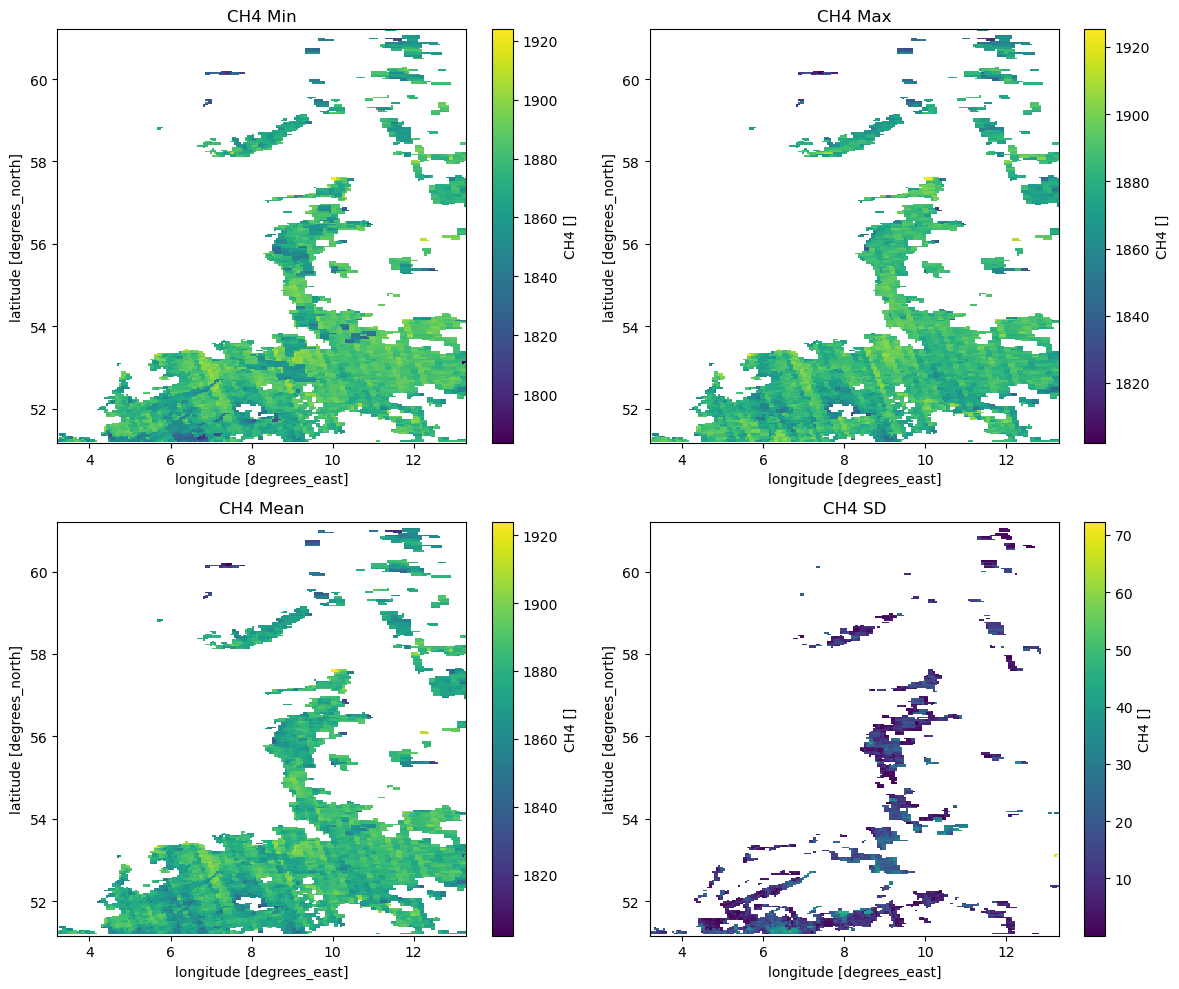

In [28]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))


ds_min.CH4.plot(ax=axes[0, 0], cmap='viridis', add_colorbar=True)
axes[0, 0].set_title('CH4 Min')

ds_max.CH4.plot(ax=axes[0, 1], cmap='viridis', add_colorbar=True)
axes[0, 1].set_title('CH4 Max')

ds_mean.CH4.plot(ax=axes[1, 0], cmap='viridis', add_colorbar=True)
axes[1, 0].set_title('CH4 Mean')

ds_std.CH4.plot(ax=axes[1, 1], cmap='viridis', add_colorbar=True)
axes[1, 1].set_title('CH4 SD')

plt.tight_layout()
plt.show()

## Exercise 3.4 Data preparation (2 pt)

Load the coordinates and labels of the CH4 plumes coming from gas infrastructure, oil infrastruture and coal mines from [all TROPOMI detected plumes for 2021. (Schuit et al. 2023)](https://zenodo.org/records/8087134).

**In total, there are 1913 plumes from gas infrastructure, oil infrastruture and coal mines. You can choose >=50 plumes (approximately equally distributed between the three categories). Feel free to divide and conquer (see the file Batch-job-combine-tasks.ipynb) for suggestions. If you split the task with other students, each should download the data for at least 20 plumes.**

For each plume, compute a 0.5 deg x 0.5 deg rectangle around the plume. We will assume that if a point source is a super-emitter, then it's emissions are noticeable almost every day. We are going to generate features based on the observation of CH4, CO, SO2 and NO2 from Sentinel 5P data and S5 and S6 from Sentinel 3 SLSTR data observed during Jan 2021 over each rectangle. Reasons for choosing these features:  
- CO, SO2 and NO2 are co-emitted in oil&gas industry and coal mines. See, for example, [Fioletov et al. (2016)](https://doi.org/10.5194/acp-16-11497-2016) and [Trenchev et al. (2023)](https://doi.org/10.3390/rs15061590)
- Methane has a "spectral fingerprint" - a unique way of absorbing infrared light, which can be used to identify emitters using satellites, which were not originally intended for tracking methane. An additional benefit of this approach is that such sattelites usually have higher resolution, so it is easier to pinpoint the point sources. See: [publication about NASA's EMIT mission](https://www.nasa.gov/centers-and-facilities/jpl/methane-super-emitters-mapped-by-nasas-new-earth-space-mission/) and [Pandey et al. (2023)](https://doi.org/10.1016/j.rse.2023.113716).

You need to:
1. Using batch jobs and server-side processes (aggregate_spatial, see details in Batch-job-combine-tasks.ipynb), compute a time-series with mean observations over each rectangle for Jan 2021.
2. Locally, compute [min, max, mean, sd and median] over Jan 2021 for the mean-over-rectangle for CH4, CO, SO2 and NO2 from Sentinel 5P and S5 and S6 from Sentinel 3 SLSTR data.

In the end, each plume should have 5x6 features: [min_CH4_Jan_2021,...,median_S6_Jan_2021].
 
Notes:
- Sentinel 3 has significantly higher resolution than Sentinel 5P. Hence, your image for Sentinel 3 will contain significantly more pixels than the one for Sentinel 5P for the same spatial and temporal extents
- If you use job=datacube.create_job() and then job.start() then the batch jobs are performed asynchronously, meaning you can shut down the device and retrieve the results later (within 7 days). To give you a sense of approx. time: Sentinel 5P computations need to be done individually per band but for Sentinel 3 the bands can be combined. You can run at most 2 simultaneous batch jobs on Copernicus servers. Hence, in total, you can complete all batch jobs in 3 attempts. When I computed the example in Batch-job-combine-tasks.ipynb for two rectangles for CH4, the job took about 2 mins to complete but the actual running time was 74 seconds (rest is queueing)


In [4]:
# Load the coordinates and labels of the CH4 plumes coming from gas infrastructure, 
# oil infrastruture and coal mines from [all TROPOMI detected plumes for 2021. (Schuit et al. 2023)]
# (https://zenodo.org/records/8087134). 
download_path = "/coursedata/users/nguyenb5"

CH4_plumes = pd.read_csv(f"{download_path}/assignment3_Task4/Schuit_etal2023_TROPOMI_all_plume_detections_2021.csv")

# Filter out rows where estimated_source_type is "unclassified"
CH4_plumes = CH4_plumes[CH4_plumes['estimated_source_type'] != 'Unclassified']

# For each plume, compute the spatial extent of an area 1 deg x 1 deg around the plume
CH4_plumes['west'] = CH4_plumes['lon'] - 0.5
CH4_plumes['east'] = CH4_plumes['lon'] + 0.5
CH4_plumes['south'] = CH4_plumes['lat'] - 0.5
CH4_plumes['north'] = CH4_plumes['lat'] + 0.5

print("Number of data points:", len(CH4_plumes))

CH4_plumes.head()

Number of data points: 2944


,date,time_UTC,lat,lon,source_rate_t/h,uncertainty_t/h,estimated_source_type,west,east,south,north
0,20210101,06:00:45,36.75,109.76,32,16,Coal,109.26,110.26,36.25,37.25
1,20210101,06:00:55,37.53,110.75,39,22,Coal,110.25,111.25,37.03,38.03
2,20210101,07:37:49,20.89,85.22,4,2,Coal,84.72,85.72,20.39,21.39
3,20210101,07:38:15,23.30,90.79,51,15,Landfill/Urban,90.29,91.29,22.80,23.80
4,20210101,07:38:27,23.56,86.44,25,12,Coal,85.94,86.94,23.06,24.06


In [14]:
# Filter the data for each category and select the first 20 rows
gas_plumes = CH4_plumes[CH4_plumes['estimated_source_type'] == 'Gas'].head(200)
oil_plumes = CH4_plumes[CH4_plumes['estimated_source_type'] == 'Oil'].head(200)
coal_plumes = CH4_plumes[CH4_plumes['estimated_source_type'] == 'Coal'].head(200)
# We are exempt to use landfill/urban plumes. Classifying gas, oil and coal are enough
landfill_urban_plumes = CH4_plumes[CH4_plumes['estimated_source_type'] == 'Landfill/Urban'].head(200)

print(len(gas_plumes))
print(len(oil_plumes))
print(len(coal_plumes))
print(len(landfill_urban_plumes))

200
200
200
200


In [44]:
# print(connection.list_collections())
for collection in connection.list_collections():
    print(collection['id'])

SENTINEL3_OLCI_L1B
SENTINEL3_SLSTR
SENTINEL_5P_L2
SENTINEL2_L1C
SENTINEL2_L2A
SENTINEL1_GRD
COPERNICUS_30
LANDSAT8_L2


Disclaimer:
Due to the extremely long time of data preparation, I have reduced the number of datapoints to 80, each class has 20 datapoints and the class Unclassified is not considered

In [2]:
connection = openeo.connect(url="openeo.dataspace.copernicus.eu")
connection.authenticate_oidc()

Visit https://identity.dataspace.copernicus.eu/auth/realms/CDSE/device?user_code=WEHL-BZDQ 📋 to authenticate.

[####################################-] ✅ Authorized successfully

Authenticated using device code flow.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

**1. Define the datacube**

In [8]:
period=("2021-01-01", "2021-01-31")

s5_CH4 = connection.load_collection(
    "SENTINEL_5P_L2",
    #spatial_extent=optional_bounding_box_for_all_plume_rectangles,
    temporal_extent = period,
    bands=["CH4"] #as before, server-side computations for S5 accept only one band at a time
)

s5_CO = connection.load_collection(
    "SENTINEL_5P_L2",
    #spatial_extent=optional_bounding_box_for_all_plume_rectangles,
    temporal_extent = period,
    bands=["CO"] #as before, server-side computations for S5 accept only one band at a time
)

s5_SO2 = connection.load_collection(
    "SENTINEL_5P_L2",
    #spatial_extent=optional_bounding_box_for_all_plume_rectangles,
    temporal_extent = period,
    bands=["SO2"] #as before, server-side computations for S5 accept only one band at a time
)


s5_NO2 = connection.load_collection(
    "SENTINEL_5P_L2",
    #spatial_extent=optional_bounding_box_for_all_plume_rectangles,
    temporal_extent = period,
    bands=["NO2"] #as before, server-side computations for S5 accept only one band at a time
)

s3_all_bands = connection.load_collection(
    "SENTINEL3_SLSTR",
    #spatial_extent=optional_bounding_box_for_all_plume_rectangles,
    temporal_extent = period,
    bands=["S5", "S6"] #as before, server-side computations for S3 accept only several bands at a time
)
    

In [15]:
CH4_plumes_list = [gas_plumes, oil_plumes, coal_plumes, landfill_urban_plumes]
plume_names = ["gas", "oil", "coal", "landfill_urban"]
               
for i, plume_data in enumerate(CH4_plumes_list):
    plumes_geojson = {
        "type": "FeatureCollection",
        "features": []
    }
    
    for index, row in plume_data.iterrows():

        west = row['lon'] - 0.25
        east = row['lon'] + 0.25
        south = row['lat'] - 0.25
        north = row['lat'] + 0.25

        # Construct the rectangle's coordinates in counter-clockwise order starting from the South-East vertex
        coordinates = [[[east, south], [west, south], [west, north], [east, north], [east, south]]]
        # print(coordinates)
        # Create a GeoJSON feature for the current area of interest
        feature = {
            "type": "Feature",
            "properties": {},  # You can add properties if needed
            "geometry": {
                "type": "Polygon",
                "coordinates": coordinates
            }
        }

        plumes_geojson['features'].append(feature)

    with open(f"{download_path}/assignment3_Task4/{plume_names[i]}_geojson.json", 'w') as file:
        json.dump(plumes_geojson, file, indent=4)

**3. Add reducer and initiate the job**

### Divide and conquer between 5 accounts
### Each account can run 2 concurrent jobs

From now, I run the 15 ipynb files in this same directory to gather data for gas, coal and oil, each having 200 plumes. In total, 600 plumes data are obtainted. Now, we can extract the results and turn them into Pandas dataframe

In [3]:
def calculate_statistics(df):
    stats =  np.array([
        df.min(axis=1, skipna=True),
        df.max(axis=1, skipna=True),
        df.mean(axis=1, skipna=True),
        df.std(axis=1, skipna=True),
        df.median(axis=1, skipna=True)
    ]).T
    return stats

feature_matrices = {
    "gas": np.zeros((200, 5, 6)),
    "oil": np.zeros((200, 5, 6)),
    "coal": np.zeros((200, 5, 6))
}

# Order of datacubes for indexing 0, 1, 2, 3, 4, 5
datacube_order = ["s5_CH4", "s5_CO", "s5_SO2", "s5_NO2", "S5", "S6"]

download_path = "/coursedata/users/nguyenb5"

for plume_type in ["gas", "coal", "oil"]:
    for datacube_name in ["s5_CH4", "s5_CO", "s5_SO2", "s5_NO2", "s3_all_bands"]:
        with open(f"{download_path}/assignment3_Task4/{datacube_name}_{plume_type}.json") as file:
            data = json.load(file)
        
        df = timeseries_json_to_pandas(data)
        df.index = pd.to_datetime(df.index)
        
        if datacube_name == "s3_all_bands":
            df_band_S5 = df.xs(key=0, level='band', axis=1)
            df_band_S6 = df.xs(key=1, level='band', axis=1)
               
            df_band_S5 = df_band_S5.map(lambda x: np.nan if isinstance(x, list) and x[0] is None else x)
            df_band_S6 = df_band_S6.map(lambda x: np.nan if isinstance(x, list) and x[0] is None else x)
            
            
            df_band_S5 = df_band_S5.map(lambda x: x[0] if isinstance(x, list) and isinstance(x[0], np.float) else x)
            df_band_S6 = df_band_S6.map(lambda x: x[0] if isinstance(x, list) and isinstance(x[0], np.float) else x)
            
            df_band_S5 = df_band_S5.T
            df_band_S6 = df_band_S6.T
            
            stats_S5 = calculate_statistics(df_band_S5)
            stats_S6 = calculate_statistics(df_band_S6)

            feature_matrices[plume_type][:, :, 4] = stats_S5 
            feature_matrices[plume_type][:, :, 5] = stats_S6  
        else:
            df = df.map(lambda x: np.nan if isinstance(x, list) and x[0] is None else x)
            df = df.map(lambda x: x[0] if isinstance(x, list) and isinstance(x[0], float) else x)
            df = df.T
            stats = calculate_statistics(df)
            index = datacube_order.index(datacube_name)
            feature_matrices[plume_type][:, :, index] = stats


## Exercise 3.5 SVM (4 pt)

Build an SVM model using the data you prepared in Exercise 3.4

In [10]:
def replace_nans_with_mean(feature_matrices):
    for key in feature_matrices:
        mean_val = np.nanmean(feature_matrices[key])
        feature_matrices[key] = np.nan_to_num(feature_matrices[key], nan=mean_val)
    return feature_matrices

feature_matrices_noNAN = replace_nans_with_mean(feature_matrices)

flattened_features = {key: value.reshape(value.shape[0], -1) for key, value in feature_matrices_noNAN.items()}

# Assign labels to each class
labels = {
    "gas": np.full(flattened_features["gas"].shape[0], 0),
    "oil": np.full(flattened_features["oil"].shape[0], 1),
    "coal": np.full(flattened_features["coal"].shape[0], 2)
}


X = np.concatenate((flattened_features["gas"], flattened_features["oil"], flattened_features["coal"]), axis=0)
y = np.concatenate((labels["gas"], labels["oil"], labels["coal"]), axis=0)

indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Split the data into training (80%), and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)  


model = svm.SVC(kernel='linear')  
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {round(train_accuracy, 3)}")

# Evaluate the model
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {round(test_accuracy, 3)}")

print("\nClassification report (Training set):")
print(classification_report(y_train, y_train_pred, zero_division=0))

print("\nClassification report (Testing set):")
print(classification_report(y_test, y_test_pred, zero_division=0))

Training Accuracy: 0.567
Testing Accuracy: 0.633

Classification report (Training set):
              precision    recall  f1-score   support

           0       0.48      0.63      0.55       160
           1       0.56      0.53      0.54       160
           2       0.72      0.54      0.62       160

    accuracy                           0.57       480
   macro avg       0.59      0.57      0.57       480
weighted avg       0.59      0.57      0.57       480


Classification report (Testing set):
              precision    recall  f1-score   support

           0       0.53      0.68      0.59        40
           1       0.54      0.50      0.52        40
           2       0.91      0.72      0.81        40

    accuracy                           0.63       120
   macro avg       0.66      0.63      0.64       120
weighted avg       0.66      0.63      0.64       120



It appears that the classification model is performing not well enough as expected, only better than random guess a little bit (33.3%). 

This is possibly because there are many NaN in the collected data from the plumes. Additionally, there are also regions that do not have any emission value, and have to be replaced with the mean value. This really makes the model hard to classify since there is much fewer data than expected. 

Another reason could be that the dataset do not have enough plumes, as each class has 200 datapoints. The result could be better if each class has 300-400 datapoints. 

The final reason is that SVM can be quite weak in classifiying nonlinear data, especially when its kernel is linear type, which is basically hyperplanes that separates the datapoints

## Exercise 3.6 Discuss the approach you took in Exercises 3.4 and 3.5. (2 pt)

Some points to consider:
- Strength and weaknesses? 
- Suggestions for improvement? 
- Implications for policy-makers? 
- Possible further research questions?
- Ethical considerations?

1. Strengths and Weaknesses

- Strengths: To find out the methane emissions from various sources, the strategy includes advanced satellite imagery and data processing tools that we discuss previously using Sentinel 3 and 5. The model makes use of the spatial and spectral properties of the emissions to accurately categorize the sources of methane emissions through SVM classification model.

- Weaknesses: Because the model depends on satellite data, there may be restrictions on the amount of cloud cover, the resolution, and the availability of data. Variability in emission patterns and the existence of mixed sources nearby could affect how accurately emission sources are classified. 

2. Suggestions for Improvement

Advanced machine learning models like deep learning could work better in feature extraction and classification, such as deep neural networks, though we should not always depend on Deep Learning for all possible problems. Additionally, we need to tune the hyperparameters of the ML model to improve its accuracy in order to be used in real-world applications.

3. Implications for Policymakers

Policymakers can use results from this research to identify high-emission zones and make decisions to reudce these emissions. The classification of emissions by source type like gas, coal and oil also helps policy-makers in making regulations and interventions specific to each industry sector.

4. Possible Further Research Questions

- Question 1: Investigating the temporal variability in emissions from identified sources could give us patterns related to operational practices of industrial complex like coal miners and oil plants.

- Question 2: Studying the effect of meteorological conditions on the variability of emissions could improve the accuracy of emission estimations.

5. Ethical Considerations

The use of satellite data for environmental monitoring must not violate privacy concerns. Additionally, there's a responsibility to ensure that the model's findings are used ethically, focusing solely on environmental protection without unfairly targeting specific regions or industries.

## (Optional) Exercise 3.7 Use any other (supervised or unsupervised) classification algorithm on data you prepared in Exercise 3.4 (3 pt)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_classifier.fit(X_train, y_train)

y_train_pred = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {round(train_accuracy, 3)}")

# Evaluate the model
y_test_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {round(test_accuracy, 3)}")

print("\nClassification report (Training set):")
print(classification_report(y_train, y_train_pred, zero_division=0))

print("\nClassification report (Testing set):")
print(classification_report(y_test, y_test_pred, zero_division=0))

Training Accuracy: 1.0
Testing Accuracy: 0.892

Classification report (Training set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       160

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480


Classification report (Testing set):
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.87      0.85      0.86        40
           2       0.91      0.97      0.94        40

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



Why did you choose this algorithm? Compare to the approach and results in Exercise 3.5.

I choose Random Forest because it is much more robust and can usually perform well in diverse dataset in larger dimensions. Random Forest can also handle nonlinear data very well, and its training is also not computationally demanding like XGBOOST. Additionally, unlike SVM, which might require careful tuning of parameters (like the kernel choice and regularization strength), Random Forest tends to perform well with default parameters. 

Compared to SVM classifier in exercise 3.5, we can see that Random Forest outperformed SVM with a testing accuracy of 0.892 as opposed to 0.633 for SVM. This suggests that Random Forest performs better when extrapolating training data to unknown data, probably because it can better represent decision boundaries using a collection of decision trees.

Random Forest did not experience overfitting to the same extent as we thought, even though it achieved perfect training accuracy (1.0). Part of the reason for this robustness is that Random Forest reduces the variance of the model without raising bias by averaging several deep decision trees, each of which was trained on a sample of data.

## (Optional) Exercise 3.8 Test the model from Exercise 3.5 against a different time period (3 pt)

Assume that the location of super-emitters remains relatively stable over time. As in Exercise 3.4 load the data for the point sources but now for a different time period (say, Jan of another year or another month in 2021). Test how well your model from Exercise 3.5 performs on this new data. Discuss